## TPOT
* TPOP can do feature selection, feature preprocessing, feature construction, model selecton and parameter Optimization. but could not do data cleansing and data validation
* it work fast for small data set but slow for big one. can sample some data and apply TPOT
* long runtime, high computational expense as well complex pipeline with low interpretability
* Now only avaliable for supervised learning
    * support random forests, linear models, SVMs, KNN, xgboost, random forest and bayesian
    * preprocessing steps (missing value imputation, scaling, PCA, standardlization
    * feature selection: base on tree model, variance,or F_value ratio
    * can export the training process as sklearn pipeline py file
    
TPOT is meant to be an assistant that gives you ideas on how to solve a particular machine learning problem by exploring pipeline configurations that you might have never considered, then leaves the fine-tuning to more constrained parameter tuning techniques such as grid search.

In [8]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
from icecream import ic
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

ic| data.shape: (1797, 64)
ic| digits.target[0]: 0


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


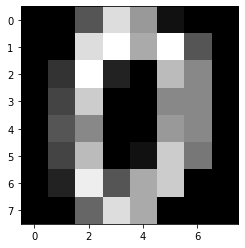

In [11]:
digits = load_digits()
data = digits.data
ic(data.shape)
print(digits.images[0])
ic(digits.target[0])
plt.gray()
plt.imshow(digits.images[0])
plt.show()


In [14]:
X_train,X_test, y_train, y_test = train_test_split(data.astype(np.float64),
                                                  digits.target.astype(np.float64),
                                                  test_size =0.25,random_state =42)

### using tpot

In [18]:
tpot = TPOTClassifier(generations =5, population_size =50,
                      verbosity =2, random_state =42, n_jobs = -2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9844058928817294

Generation 2 - Current best internal CV score: 0.9844141539308826

Generation 3 - Current best internal CV score: 0.9866363761531047

Generation 4 - Current best internal CV score: 0.9866363761531047

Generation 5 - Current best internal CV score: 0.9866363761531047

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=2, p=2, weights=distance)
0.9822222222222222


### Model that be found by TPOT

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Average CV score on the training set was: 0.9866363761531047
exported_pipeline = KNeighborsClassifier(n_neighbors=2, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
accuracy_score(y_test, results)

0.9822222222222222

## Manual ML

Here I will use LR, CART, LDA, Native bayesian, SVM, KNN,AdaBoost, XGBoost to compare

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [50]:
ss = StandardScaler()
# small dataset use liblinear, big dataset use sag or saga
lr = LogisticRegression(solver ='liblinear', multi_class ='auto')
dt = DecisionTreeClassifier()
dtStump = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 1)
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

'''
rbf: Radial Basis Function which is calculate squared Euclidean distance between two data points.
c:is the penalty for misclassifying a data point. When C is small, the classifier is okay with
misclassified data points (high bias, low variance). When C is large, the classifier is heavily
penalized for misclassified data and therefore bends over backwards avoid any misclassified 
data points (low bias, high variance). c could be 1,10,100,10000 etc.
'''
svm = svm.SVC(kernel ='rbf', C=1.0, gamma ='auto')
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(base_estimator=dtStump, n_estimators= 500)
xgb = XGBClassifier()

alg ={'lr':lr,'DT':dt, 'lda':lda, 'gnb':gnb, 'bnb':bnb,
      'svm': svm, 'knn':knn, 'adaboost': adaboost, 'xgb': xgb}
for name, model in alg.items():
    pipe = make_pipeline(ss, model)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print('%s accuracy: %0.4lf'% (name,accuracy_score(y_test,pred)))

lr accuracy: 0.9667
DT accuracy: 0.8756
lda accuracy: 0.9489
gnb accuracy: 0.7756
bnb accuracy: 0.8844
svm accuracy: 0.9822
knn accuracy: 0.9756
adaboost accuracy: 0.9711
xgb accuracy: 0.9756
